**Importing libraries**

In [ ]:
! pip install fuzzy-c-means
! pip install git-python
! pip install -U scikit-fuzzy

import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import git
from fcmeans import FCM
#from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from skfuzzy import cmeans
import skfuzzy as sf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=3c4481522acc60518917152edb8308edecb23c0db7f04574cb2fa4993ff298d8
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Su

**Paddy**

In [ ]:
data_paddy = {
    'Block Name': ['Andhanallur', 'Manikandam', 'Tiruverumbur', 'Manapparai', 'Marungapuri', 'Vaiyampatti', 'Musiri', 'Thathaiyangarpettai', 'Thottiyam', 'Thuraiyur', 'Uppiliyapuram', 'Lalgudi', 'Mannachanallur', 'Pullambadi'],
    'Area (Ha)': [3930, 6200, 8250, 900, 2000, 900, 2600, 1000, 2500, 1650, 7700, 13000, 3350, 4620], 
    'Production (MT)': [16101, 25503, 3596, 3630, 8066, 3630, 10532, 4097, 10083, 6717, 31547, 54179, 13725, 18642]
}
df_paddy = pd.DataFrame(data_paddy)
df_paddy

,Block Name,Area (Ha),Production (MT)
0,Andhanallur,3930,16101
1,Manikandam,6200,25503
2,Tiruverumbur,8250,3596
3,Manapparai,900,3630
4,Marungapuri,2000,8066
5,Vaiyampatti,900,3630
6,Musiri,2600,10532
7,Thathaiyangarpettai,1000,4097
8,Thottiyam,2500,10083
9,Thuraiyur,1650,6717


In [ ]:
a = 10000 # 1 Hectare = 10000 m**2
b = 1000 # 1 MT (Metric Ton) = 1000 Kg

df_paddy['normalizedArea'] = [i * a for i in df_paddy['Area (Ha)']]
df_paddy['normalizedProd'] = [i * b for i in df_paddy['Production (MT)']]

column1 = df_paddy['normalizedArea']
column2 = df_paddy['normalizedProd']
df_paddy['Prod/Area'] = column2.divide(column1)
df_paddy = df_paddy.drop(['Area (Ha)', 'Production (MT)', 'normalizedArea', 'normalizedProd'], axis = 1)

block_name = df_paddy['Block Name']
df_paddy = df_paddy.drop(['Block Name'], axis = 1)
df_paddy

,Prod/Area
0,0.409695
1,0.411339
2,0.043588
3,0.403333
4,0.403300
5,0.403333
6,0.405077
7,0.409700
8,0.403320
9,0.407091


**Cluster fixing**

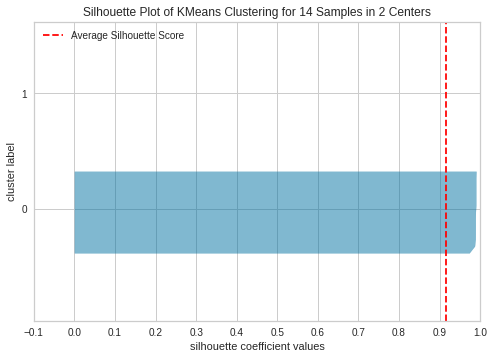

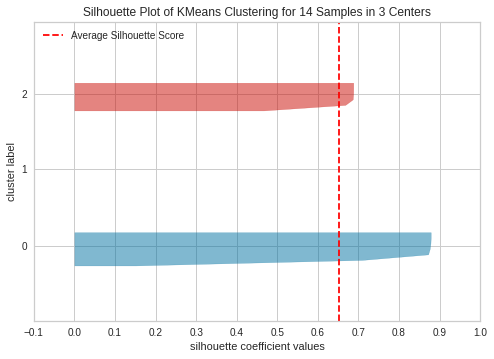

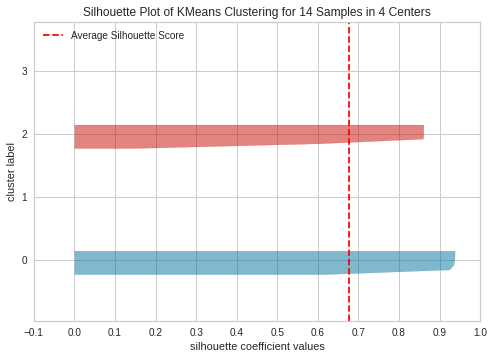

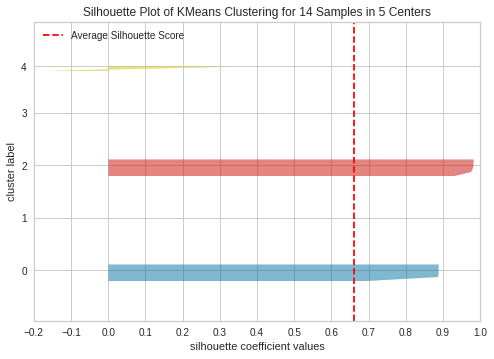

Optimal k is 3


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2, 6):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(df_paddy)        # Fit the data to the visualizer
  visualizer.show()     

print("Optimal k is 3")

Normalized data

In [ ]:
# Run FCM algorithm
centers, u, u0, d, jm, p, fpc = cmeans(data = df_paddy.T, c = 3, m = 2, error = 0.0005, maxiter = 100000)

# Print membership values
fmemb = u

In [ ]:
paddy_fmemb = pd.DataFrame(fmemb.T, columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
labels = np.argmax(u, axis=0)
X = pd.concat([block_name, df_paddy, paddy_fmemb, pd.Series(labels)], axis = 1)
X.to_csv('file1.csv')
X

,Block Name,Prod/Area,Cluster 1,Cluster 2,Cluster 3,0
0,Andhanallur,0.409695,3.166688e-02,9.683251e-01,0.000008,1
1,Manikandam,0.411339,6.247279e-03,9.937501e-01,0.000003,1
2,Tiruverumbur,0.043588,2.445621e-15,2.354938e-15,1.000000,2
3,Manapparai,0.403333,9.946766e-01,5.321125e-03,0.000002,0
4,Marungapuri,0.403300,9.940592e-01,5.938207e-03,0.000003,0
5,Vaiyampatti,0.403333,9.946766e-01,5.321125e-03,0.000002,0
6,Musiri,0.405077,9.570270e-01,4.296241e-02,0.000011,0
7,Thathaiyangarpettai,0.409700,3.130045e-02,9.686916e-01,0.000008,1
8,Thottiyam,0.403320,9.944330e-01,5.564626e-03,0.000002,0
9,Thuraiyur,0.407091,5.638520e-01,4.361038e-01,0.000044,0


**Membership func**

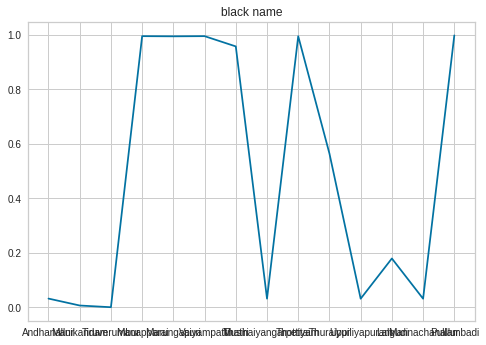

In [ ]:
x = X['Block Name']
y = X['Cluster 1']

plt.plot(x, y)
plt.title("black name")
plt.show()

**Millets**

In [ ]:
data_millet = {
    'Block Name': ['Andhanallur', 'Manikandam', 'Tiruverumbur', 'Manapparai', 'Marungapuri', 'Vaiyampatti', 'Musiri', 'Thathaiyangarpettai', 'Thottiyam', 'Thuraiyur', 'Uppiliyapuram', 'Lalgudi', 'Mannachanallur', 'Pullambadi'],
    'Area (Ha)': [0, 300, 0, 3760, 1830, 4005, 4940, 6185, 6135, 4715, 3235, 0, 5070, 6925], 
    'Production (MT)': [0, 542, 0, 6939, 3424, 9421, 10428, 12945, 14300, 15549, 13421, 0, 15682, 52457], 
}
df_millet = pd.DataFrame(data_millet)
df_millet

,Block Name,Area (Ha),Production (MT)
0,Andhanallur,0,0
1,Manikandam,300,542
2,Tiruverumbur,0,0
3,Manapparai,3760,6939
4,Marungapuri,1830,3424
5,Vaiyampatti,4005,9421
6,Musiri,4940,10428
7,Thathaiyangarpettai,6185,12945
8,Thottiyam,6135,14300
9,Thuraiyur,4715,15549


In [ ]:
a = 10000 # 1 Hectare = 10000 m**2
b = 1000 # 1 MT (Metric Ton) = 1000 Kg

df_millet['normalizedArea'] = [i * a for i in df_millet['Area (Ha)']]
df_millet['normalizedProd'] = [i * b for i in df_millet['Production (MT)']]

column1 = df_millet['normalizedArea']
column2 = df_millet['normalizedProd']
df_millet['Prod/Area'] = column2.divide(column1)
df_millet = df_millet.drop(['Area (Ha)', 'Production (MT)', 'normalizedArea', 'normalizedProd'], axis = 1)

block_name = df_millet['Block Name']
df_millet = df_millet.drop(['Block Name'], axis = 1)
df_millet

,Prod/Area
0,NaN
1,0.180667
2,NaN
3,0.184548
4,0.187104
5,0.235231
6,0.211093
7,0.209297
8,0.233089
9,0.329777


In [ ]:
df_millet = df_millet.replace(np.nan, 0)
df_millet

,Prod/Area
0,0.000000
1,0.180667
2,0.000000
3,0.184548
4,0.187104
5,0.235231
6,0.211093
7,0.209297
8,0.233089
9,0.329777


**Cluster fixing**

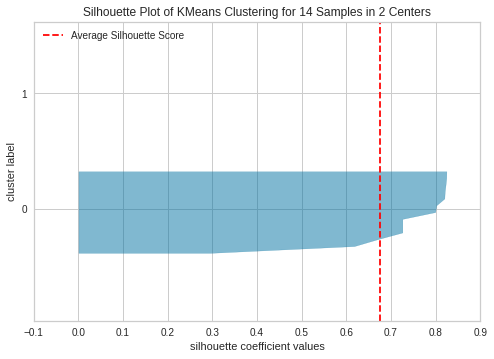

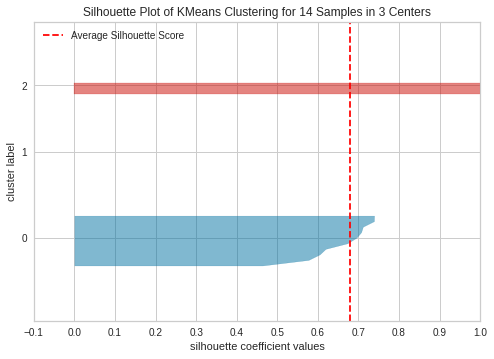

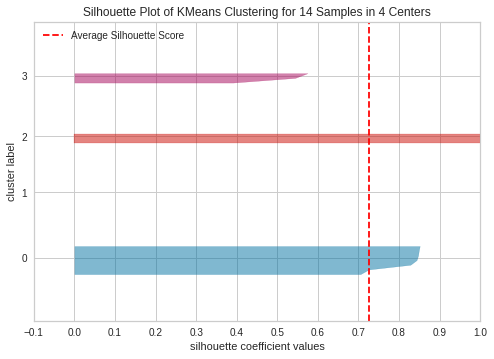

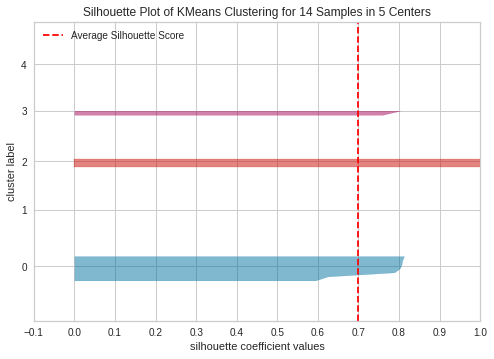

Optimal k is 3


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2, 6):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(df_millet)        # Fit the data to the visualizer
  visualizer.show()     

print("Optimal k is 3")    

**Normalized data**

In [ ]:
# Run FCM algorithm
centers, u, u0, d, jm, p, fpc = cmeans(data = df_millet.T, c = 3, m = 2, error = 0.0005, maxiter = 100000)

# Print membership values
fmemb = u

In [ ]:
millet_fmemb = pd.DataFrame(fmemb.T, columns=['Cluster 1', 'Cluster2', 'Cluster3'])
labels = np.argmax(u, axis=0)
Y = pd.concat([block_name, millet_fmemb, pd.Series(labels)], axis = 1)
Y.to_csv("file2.csv")
Y

,Block Name,Cluster 1,Cluster2,Cluster3,0
0,Andhanallur,0.000034,0.000323,0.999643,2
1,Manikandam,0.010210,0.885433,0.104357,1
2,Tiruverumbur,0.000034,0.000323,0.999643,2
3,Manapparai,0.009233,0.901654,0.089113,1
4,Marungapuri,0.008589,0.911547,0.079864,1
5,Vaiyampatti,0.000137,0.999194,0.000668,1
6,Musiri,0.003112,0.976186,0.020702,1
7,Thathaiyangarpettai,0.003459,0.972963,0.023578,1
8,Thottiyam,0.000251,0.998492,0.001256,1
9,Thuraiyur,0.040755,0.893091,0.066155,1


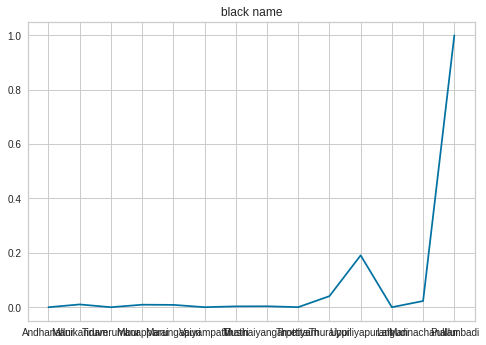

In [ ]:
x = Y['Block Name']
y = Y['Cluster 1']
y_millet = sf.membership.gaussmf(df_millet, df_millet.mean(), df_millet.std())

plt.plot(x, y)
plt.title("black name")
plt.show()

**Pulses**

In [ ]:
data_pulse = {
    'Block Name': ['Andhanallur', 'Manikandam', 'Tiruverumbur', 'Manapparai', 'Marungapuri', 'Vaiyampatti', 'Musiri', 'Thathaiyangarpettai', 'Thottiyam', 'Thuraiyur', 'Uppiliyapuram', 'Lalgudi', 'Mannachanallur', 'Pullambadi'],
    'Area (Ha)': [1870, 475, 605, 485, 800, 630, 780, 730, 725, 515, 510, 2340, 1560, 975], 
    'Production (MT)': [1453, 369, 470, 344, 583, 467, 641, 587, 576, 378, 380, 1765, 1168, 772],
}
df_pulse = pd.DataFrame(data_pulse)
df_pulse

,Block Name,Area (Ha),Production (MT)
0,Andhanallur,1870,1453
1,Manikandam,475,369
2,Tiruverumbur,605,470
3,Manapparai,485,344
4,Marungapuri,800,583
5,Vaiyampatti,630,467
6,Musiri,780,641
7,Thathaiyangarpettai,730,587
8,Thottiyam,725,576
9,Thuraiyur,515,378


In [ ]:
a = 10000 # 1 Hectare = 10000 m**2
b = 1000 # 1 MT (Metric Ton) = 1000 Kg

df_pulse['normalizedArea'] = [i * a for i in df_pulse['Area (Ha)']]
df_pulse['normalizedProd'] = [i * b for i in df_pulse['Production (MT)']]

column1 = df_pulse['normalizedArea']
column2 = df_pulse['normalizedProd']
df_pulse['Prod/Area'] = column2.divide(column1)
df_pulse = df_pulse.drop(['Area (Ha)', 'Production (MT)', 'normalizedArea', 'normalizedProd'], axis = 1)

block_name = df_pulse['Block Name']
df_pulse = df_pulse.drop(['Block Name'], axis = 1)
df_pulse

,Prod/Area
0,0.077701
1,0.077684
2,0.077686
3,0.070928
4,0.072875
5,0.074127
6,0.082179
7,0.080411
8,0.079448
9,0.073398


**

**

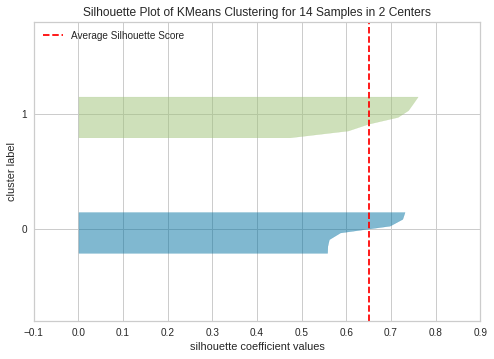

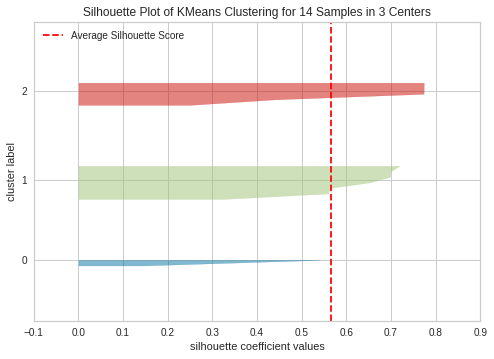

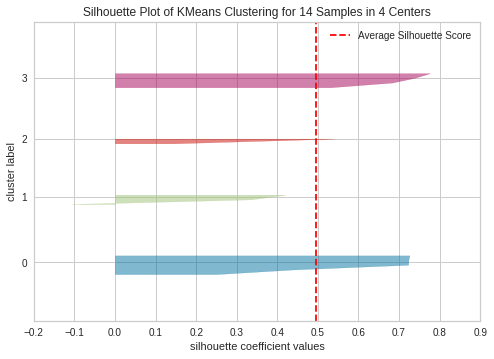

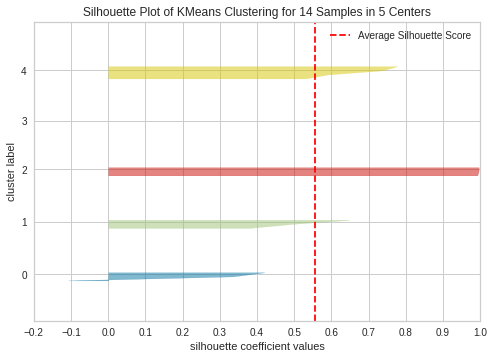

Optimal k is 2


In [ ]:


from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2, 6):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(df_pulse)        # Fit the data to the visualizer
  visualizer.show()     

print("Optimal k is 2")    




Normalized data

In [ ]:
# Run FCM algorithm
centers, u, u0, d, jm, p, fpc = cmeans(data = df_pulse.T, c = 2, m = 2, error = 0.0005, maxiter = 100000)

# Print membership values
fmemb = u

In [ ]:
pulse_fmemb = pd.DataFrame(fmemb.T, columns=['Cluster 1', 'Cluster 2'])
labels = np.argmax(u, axis=0)
Z = pd.concat([block_name, df_pulse, pulse_fmemb, pd.Series(labels)], axis = 1)
Z.to_csv("file3.csv")
Z

,Block Name,Prod/Area,Cluster 1,Cluster 2,0
0,Andhanallur,0.077701,0.129414,0.870586,1
1,Manikandam,0.077684,0.132805,0.867195,1
2,Tiruverumbur,0.077686,0.132441,0.867559,1
3,Manapparai,0.070928,0.894693,0.105307,0
4,Marungapuri,0.072875,0.980415,0.019585,0
5,Vaiyampatti,0.074127,0.995134,0.004866,0
6,Musiri,0.082179,0.110525,0.889475,1
7,Thathaiyangarpettai,0.080411,0.031397,0.968603,1
8,Thottiyam,0.079448,0.001678,0.998322,1
9,Thuraiyur,0.073398,0.995904,0.004096,0


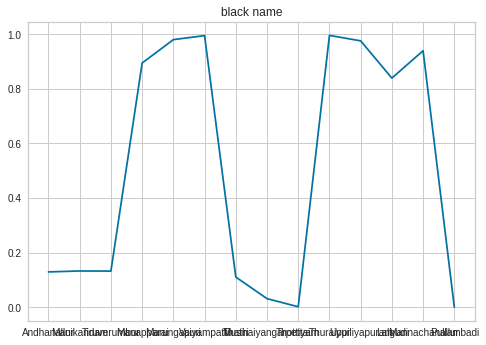

In [ ]:
x = Z['Block Name']
y = Z['Cluster 1']
y_pulse = sf.membership.gaussmf(df_pulse, df_pulse.mean(), df_pulse.std())

plt.plot(x, y)
plt.title("black name")
plt.show()

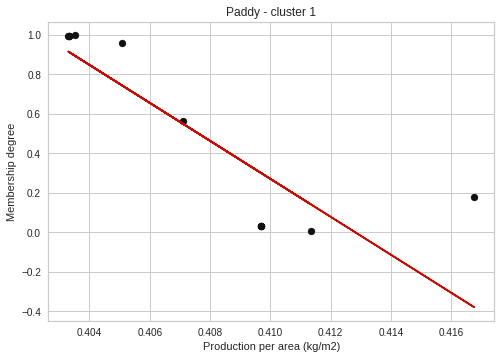

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

def myfunc(x):
  return slope * x + intercept

x = list(X['Prod/Area'].drop([2], axis = 0))
y = list(X['Cluster 1'].drop([2], axis = 0))
slope, intercept, r, p, std_err = stats.linregress(x, y)
mymodel = list(map(myfunc, x))

plt.style.use("fast")
plt.scatter(x, y, c = 'k')
plt.plot(x, mymodel, 'r')
plt.xlabel("Production per area (kg/m2)")
plt.ylabel("Membership degree")
plt.title('Paddy - cluster 1')
plt.show()

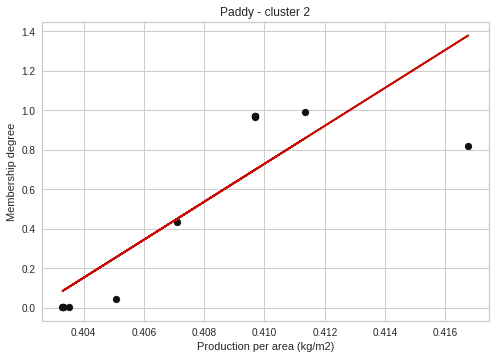

In [ ]:
x = list(X['Prod/Area'].drop([2], axis = 0))
y = list(X['Cluster 2'].drop([2], axis = 0))
slope, intercept, r, p, std_err = stats.linregress(x, y)
mymodel = list(map(myfunc, x))

plt.style.use("fast")
plt.scatter(x, y, c = 'k')
plt.plot(x, mymodel, 'r')
plt.xlabel("Production per area (kg/m2)")
plt.ylabel("Membership degree")
plt.title('Paddy - cluster 2')
plt.show()

In [ ]:
x = list(df_millet)
y = list(Y['Cluster 1'])
slope, intercept, r, p, std_err = stats.linregress(x, y)
mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, 'r')
plt.legend("feature -- memb clust1")
plt.show()

x = list(df_millet)
y = list(Y['Cluster 2'])
slope, intercept, r, p, std_err = stats.linregress(x, y)
mymodel = list(map(myfunc, x))

plt.style.use("fast")
plt.scatter(x, y, c = 'k')
plt.plot(x, mymodel, 'r')
plt.xlabel("Production per area (kg/m2)")
plt.ylabel("Membership degree")
plt.title('Paddy - cluster 2')
plt.show()

TypeError: ignored

In [ ]:
x = list(Z['Prod/Area'])
y = list(Z['Cluster 2'])
slope, intercept, r, p, std_err = stats.linregress(x, y)
mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, 'r')
plt.legend("feature -- memb clust1")
plt.show()